# Output to a text file and Input from a text file

Python is very good at reading and writing from external files and data sources.  It has to be, otherwise who would want to manually enter a gigabyte of data into a Python program for analysis?  This is an introductory course and this topic is a bit more advanced and will be covered in later courses, but it's worth our time to take a glimpse at a simple text output/input example.

In [1]:
# let's open a file from our working folder... or if the file does not exist
# this statement creates the file.  The name of the file is 'test_text.txt' and the 'w'
# signifies that we are goint to (w)rite to the file
# we store the open file name in a variable
newfile = open("test_text.txt","w")

# the file is open... let's write to it

newfile.write("Hello World... again!\n")
newfile.write("The name of the open file\n")
newfile.write("is stored in the newfile variable.\n")
newfile.write("This is the last line (so far).\n")

# don't forgot to close the file... weird things happen if you don't
newfile.close()

Look in the pyjup or your working directory/folder.  You should see a test_text.txt file.  Open the file to see if the lines were written to the file.  Now let's get that data back!

In [2]:
# open the test_text.txt for (r)eading
oldfile = open("test_text.txt","r")

# the file is open.  Get the data
# the oldfile.read() method prints the raw file data
oldfile.read()

'Hello World... again!\nThe name of the open file\nis stored in the newfile variable.\nThis is the last line (so far).\n'

In [3]:
# open the file again for reading using a different method
oldfile = open("test_text.txt","r")

# one line at a time using .readline
while True:
    line = oldfile.readline()
    print(line)
    
    if line == '':
        break

Hello World... again!

The name of the open file

is stored in the newfile variable.

This is the last line (so far).




Without the 
```python
if line == '':
    break
```
the loop would never stop!  The break statement does exactly what it mean... it breaks the loop.  the '' is an empty string, meaning an empty line with no data.  If the line is empty, the end of the file has been reached, so break out of the loop.  Here is one more example of reading a text file.

In [4]:
# open the test_text.txt for (r)eading
oldfile = open("test_text.txt","r")

# the file is open.  Get the data
# the oldfile.readlines() method prints the entire file as a LIST
oldfile.readlines()

['Hello World... again!\n',
 'The name of the open file\n',
 'is stored in the newfile variable.\n',
 'This is the last line (so far).\n']

In [5]:
# open the test_text.txt for (r)eading
oldfile = open("test_text.txt","r")

# let's save the text file in a variable and treat it like a list
file_list = oldfile.readlines()

# print the 3rd line in the text file/list
print(file_list[2])

is stored in the newfile variable.



# Using Python Packages

Python already has a powerful set of keywords and functions, but you can extend Python's vocabularly by importing external packages.  We have already glimpsed this earlier in the course when we used an 'import' statement to attach the numpy package to Python.  We will work with packages in more detail here.

There are well in excess of 100000 external packages available to extend Python's functionality! The number grows daily and while it's beyond the scope of this course, you can write your own package if you want.  You already have some skill in writing packages... a Python package is generally a set of special function(s) you've written and placed in an external file.  When you want to use your special functions, you import the file and the functions are waiting for you.  It's a very nice system!

You can import Python packages in more than one way.  For example, you can import the numpy package by using:

```python
from numpy import *
```

and ALL of the functions in numpy (and there are many) will be available to use.  Here is an example:

In [6]:
# import the numpy math package
from numpy import *

n = 7
print(sqrt(n))
print(cos(n))

# I added the following to show that you
# don't need to use a print() statement
# but only the last calculation will display
sqrt(n)
cos(n)

2.6457513110645907
0.7539022543433046


0.7539022543433046

As indicated in the remark statements, I used print() statments so both functions would display a result.  You can also use a simple sqrt(n), but only the last calculation will display.

If your program is simple and you aren't going to import additional packages that have similar functions, there is nothing wrong with this.  However, if you import more than one package and the same function exists in at least two of the imported packages, we may have a problem.  Usually, the last package has precedence and you may get unexpected results.  For example (and it isn't a good example):

In [7]:
# import numpy
from numpy import *

# import the python math package
from math import *

n = 7
print(sqrt(n))
print(cos(n))

2.6457513110645907
0.7539022543433046


OK... I wrote that this was a bad example, but given the 100000+ python packages, there is always a chance that you might import a package that will overwrite or replace the function you need to use with one that is not as accurate or even incorrect.  There are no 'package police' who verify the validity and naming of functions in a particular package.  You might find that you need to use the sin() function from numpy, but a later package import also has a sin() function... and the author of that package intended his/her function to return the hyperbolic sin rather than the traditional trig function.  It's a stretch, but stranger things have happened!

How do you fix that possibility?  It's easy... import the entire package into a unique Python variable.  Then when you need to use a function from a particular package, you use the variable name followed by the function.  Here's how:

In [8]:
# import both numpy and math
import numpy as np
import math as m

n = 7
print(np.sqrt(n))
print(np.cos(n))

print(m.sqrt(n))
print(m.cos(n))

2.6457513110645907
0.7539022543433046
2.6457513110645907
0.7539022543433046


The answers for sqrt and cos in both packages were identical.  numpy is a far more extensive Python package than math and you can visit [www.numpy.org](https://www.numpy.org) for an amazing amount of information about the numpy package... I recommend that you do so, particularly if you plan on studying Python for data analytics.

## Number Guessing Game
Let's use the Python random package to create a number guessing game.  The rules are simple:

* Python will randomly select an integer from 1 to 100
* You will enter a guess
* Python will tell you whether your guess is high or low... or correct
* If you did not guess the number, Python will let you guess again
* When you have guessed the correct number, Python will congratulate you and tell you how many guesses you made

Let's try a warm-up exercise first. Again, I used print() statements so that both results will display.  If you only need one value, you can use rn.random() or rn.randint(1,100).

In [9]:
# import the random package
import random as rn

# print a random number from 0 to 1
print(rn.random())

# print a random integer from 1 to 100 inclusive
print(rn.randint(1,100))

0.8661177148143185
95


In [12]:
# number guess game
import random as rn

# have Python pick a random number from 1 to 100
rnum = rn.randint(1,100)

# set the count guesses variable to 0
# this must be done outside the function
# see the explanation below in the local and global
# variables section

count = 0

# define a check guess function.  This should be the first function
# otherwise, we'll call check in the guess function before check is defined
def check(g):
    if g < rnum:
        print("Too low, guess again!")
        guess()
    elif g > rnum:
        print("Too high, guess again!")
        guess()
    else:
        print("You got it! It took you " + str(count) + " guesses.")

# define a guess function... this should be the second function
# it does not need an argument
def guess():
    
    # we have to declare count to be a global variable
    # so that it retains its value and can be incremented
    
    global count
    
    g = int(input("Type in your guess: "))
    
    # count your guesses
    count += 1
    
    # call the check guess function
    check(g)

# start guessing
guess()


Type in your guess: 50
Too low, guess again!
Type in your guess: 75
Too low, guess again!
Type in your guess: 87
Too high, guess again!
Type in your guess: 81
Too low, guess again!
Type in your guess: 84
You got it! It took you 5 guesses.


### A word or two about local and global variables...
You noticed the global count statement in the program?  Why did I have to do that?  Well, I wanted to count the number of guesses and if I start using the count variable in the function guess() without defining it first, I'll get an error message.  If I define the variable IN the guess() function, it will be reset each time I call the guess() function and I'll never get an accurate count.

Why is this?  Python looks at variables inside a function as local variables.  They are defined ONLY in the specific function and nowhere else.  We can send variables into the function (using arguments) and we can export variables out of the function using return, but the variables inside the function are invisible to the code outside the function.  

There are ways to fix this, but an easy method is to declare a variable as global.  When we declare a variable as global, it can be seen and used anywhere in the program.  If we want to use a global variable in a function, we simply declare it as global in the main program and in the function as we have done with count in the number guess example.

Global variables can cause problems if you use similar (or the same) variable name as both a global and local variable and many programmers frown upon using global variables.  I don't think globals are evil, but you do need to be careful and remember when you are using a global variable.

Here is an example of the confusion that may arise:

In [13]:
# s is defined outside the function and is a global variable
# and we aren't trying to change the value of s in the function
def f(): 
    print(s) 
    
s = "I love to fly!"
f()

I love to fly!


In [14]:
# no problem here... we define and print s from within the function
# and we define and print s outside the function.  Even though the
# two variables are both named 's', one is local to the function
# and the other is global.  Python considers them to be different.

def f(): 
    s = "I love to fly as much as I can!"
    print(s) 

s = "I love to fly!" 
f()
print(s)

I love to fly as much as I can!
I love to fly!


In [15]:
# now we have a problem...
# we define s outside the function and then print
# s inside the function using the first print(s)
# then we define a local variable s to be a different
# value/string, but this confuses Python.  We have two
# s variables and which or what do we mean.  Error!

def f(): 
    print(s)
    s = "I love to fly as much as I can!"
    print(s) 

s = "I to fly!" 
f()
print(s)

UnboundLocalError: local variable 's' referenced before assignment

In [16]:
# this is OK.  We declare s in the function to be global
# Python will keep the local and global variables separate
# and all is right with the Python world.

def f(): 
    # tell python the global variable s exists
    global s
    
    # this should print the
    print(s)
    
    # this is a local variable
    s = "I love to fly as much as I can!"
    print(s) 

# s is a global variable declared outside the function
s = "I love to fly!" 

# call the function
f()

# print the global variable
print(s)

I love to fly!
I love to fly as much as I can!
I love to fly as much as I can!


Not so easy to understand, but look at the code and the output.  Both global and local s variables retain their respective values.  If you intend to use a global variable (a variable declared outside a function) in a function, then use the 'global' declaration.  This is why you should be very careful about using global variables... use them, yes, but be careful!

Now back to packages...

# A Brief Introduction to pandas
pandas, according to its home website [pandas.pydata.org](https://pandas.pydata.org/) aims to be"the most powerful and flexible open source data analysis / manipulation tool available in any language" (from the documentation page).  That is a lofty goal and they may well achieve it.

We are going to start with a brief pandas example so you can see some of the potential in the pandas package.  We will also use matplotlib to plot a quick graph.

First, you need to download two data files:

* [hubble_data.csv](https://www.dropbox.com/s/hm7qkmf7ukyc6j2/hubble_data.csv?dl=1) 
* [hubble_data_no_headers.csv](https://www.dropbox.com/s/ntlit9u50gx8lp3/hubble_data_no_headers.csv?dl=1)

These files are in the public domain website and contain some data from the Hubble Space telescope.  The files are in comma separated value format (.csv), which is a very common format for data files.  You should save both files in your pyjup (or working directory).  View them in Excel or your spreadsheet program to see how the files are structured.  pandas will store the data in something called a data frame.  Essentially a data frame is a rectangular structure much like a spreadsheet.  Data frames allow for easier manipulation, analysis and visualization of data.

Let's fire up pandas and matplotlib for some simple data manipulations.


In [17]:
# import pandas for data analysis and matplotlib for plotting
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# input the hubble_data.csv and save it into the variable data
data = pd.read_csv("hubble_data.csv")

# show the top 5 rows of data
data.head()

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


In [19]:
# you can create your own headers or column labels
headers = ["dist","rec_vel"]

# read the hubble_data_no_headers.csv file and set the column names to be the headers list
data_no_headers = pd.read_csv("hubble_data_no_headers.csv", names = headers)

# display the first 5 rows of data with the new headers
data_no_headers.head()

,dist,rec_vel
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185


In [20]:
# display only the dist column
# the entire data set is displayed along with the data type
data_no_headers["dist"]

0     0.032
1     0.034
2     0.214
3     0.263
4     0.275
5     0.275
6     0.450
7     0.500
8     0.500
9     0.630
10    0.800
11    0.900
12    0.900
13    0.900
14    0.900
15    1.000
16    1.100
17    1.100
18    1.400
19    1.700
20    2.000
21    2.000
22    2.000
23    2.000
Name: dist, dtype: float64

In [21]:
# Getting ready to plot and we want distance to be the index
# or the independent axis variable
# inplace = True suppresses printing the entire list

data.set_index("distance", inplace = True)

In [22]:
# print the first five rows of data
# illustrating that distance is now
# the leftmost column

data.head()

,recession_velocity
distance,
0.032,170
0.034,290
0.214,-130
0.263,-70
0.275,-185


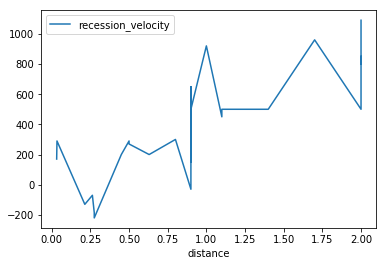

In [23]:
# plot the graph with distance as the independent variable
data.plot()

# technically, you don't NEED this line, but the plot looks better
# try it with and without by placing a # in front of the statement
plt.show()

How neat was that?  We'll explore pandas and matplotlib a bit more in the next notebook.

### Try It Yourself
Make certain to visit:

* [pandas website](https://pandas.pydata.org/)
* [matplotlib website](https://matplotlib.org/)
* [numpy website](https://www.numpy.org/)

The matplotlib website is particularly interesting, in my opinion, of course.